# Set Up

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import make_classification

In [2]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

# Check Data

In [4]:
accepted = pd.read_csv('accepted_2007_to_2018Q4.csv', low_memory=False)

In [5]:
accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
accepted.shape

(2260701, 151)

In [7]:
accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [8]:
accepted.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


### Nhận xét
- Dữ liệu có 2260701 dòng và 151 cột, trong đó có 113 cột định lượng và 38 cột định tính

# EDA

In [9]:
accepted.head(3).T

,0,1,2
id,68407277,68355089,68341763
member_id,NaN,NaN,NaN
loan_amnt,3600.0,24700.0,20000.0
funded_amnt,3600.0,24700.0,20000.0
funded_amnt_inv,3600.0,24700.0,20000.0
...,...,...,...
settlement_status,NaN,NaN,NaN
settlement_date,NaN,NaN,NaN
settlement_amount,NaN,NaN,NaN
settlement_percentage,NaN,NaN,NaN


## Loan status

In [10]:
accepted['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

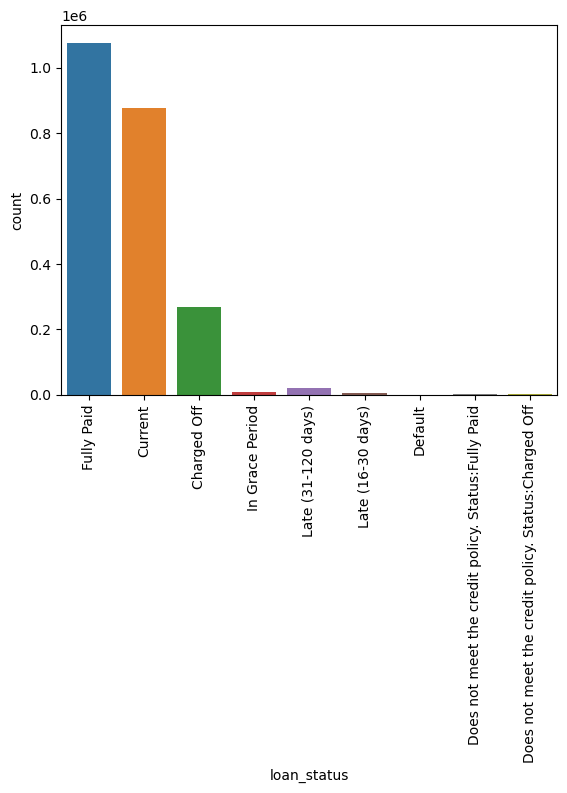

In [11]:
sns.countplot(x='loan_status', data=accepted)
plt.xticks(rotation=90)
plt.show()

Ta sẽ chỉ quan tâm tới 2 trạng thái của khoản vay là Fully Paid và Charged Off

In [12]:
data = accepted[accepted['loan_status'].isin(['Fully Paid', 'Charged Off'])]

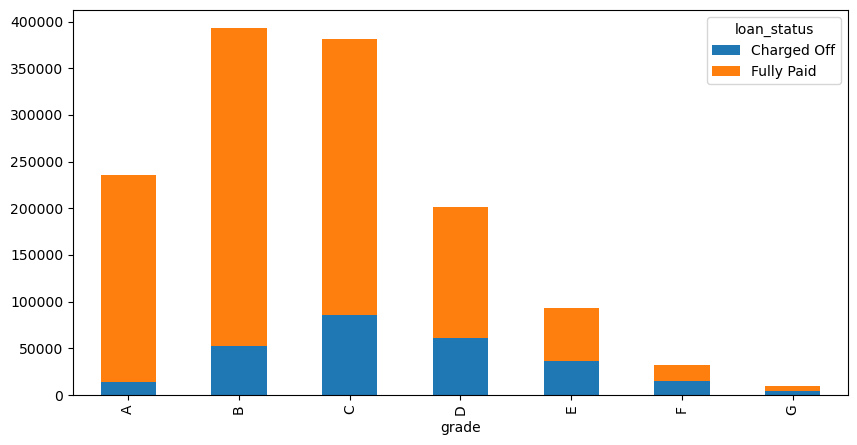

In [13]:
temp = pd.crosstab(data['grade'], data['loan_status'])
temp.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.show()

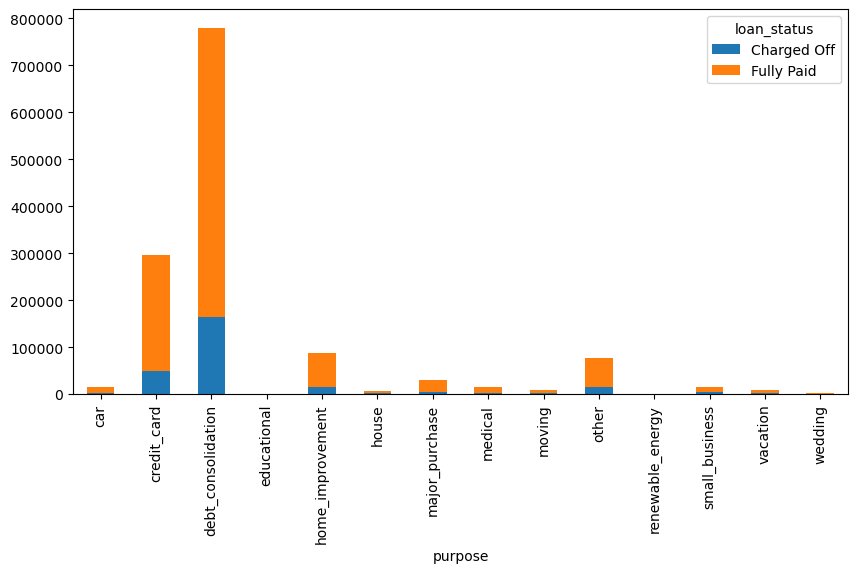

In [14]:
temp = pd.crosstab(data['purpose'], data['loan_status'])
temp.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.show()

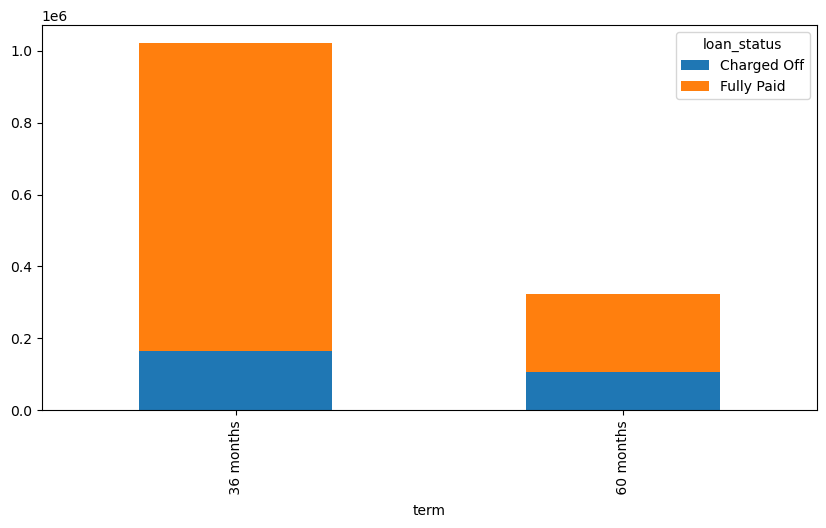

In [15]:
temp = pd.crosstab(data['term'], data['loan_status'])
temp.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.show()

## Purpose

In [16]:
data['purpose'].value_counts()

debt_consolidation    780321
credit_card           295279
home_improvement       87504
other                  77875
major_purchase         29425
medical                15554
small_business         15416
car                    14585
moving                  9480
vacation                9065
house                   7253
wedding                 2294
renewable_energy         933
educational              326
Name: purpose, dtype: int64

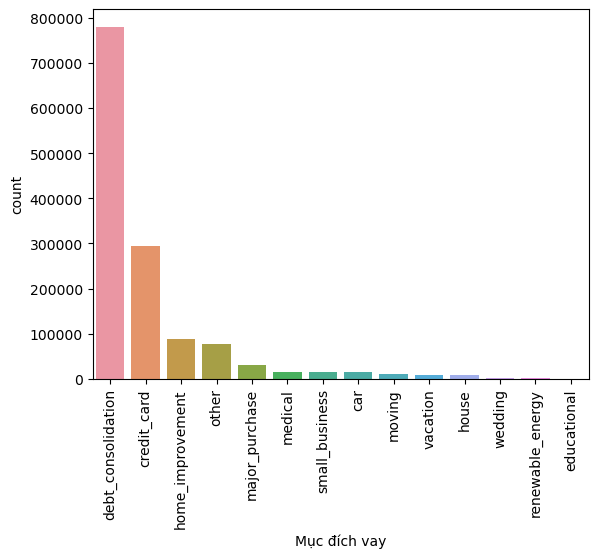

In [17]:
sns.countplot(x='purpose', data=data, order=data['purpose'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Mục đích vay')
plt.show()

## Grade

In [18]:
data['grade'].value_counts()

B    392741
C    381686
A    235090
D    200953
E     93650
F     32058
G      9132
Name: grade, dtype: int64

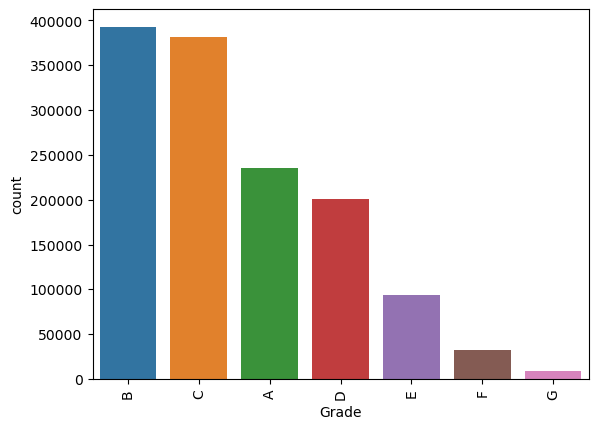

In [19]:
sns.countplot(x='grade', data=data, order=data['grade'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Grade')
plt.show()

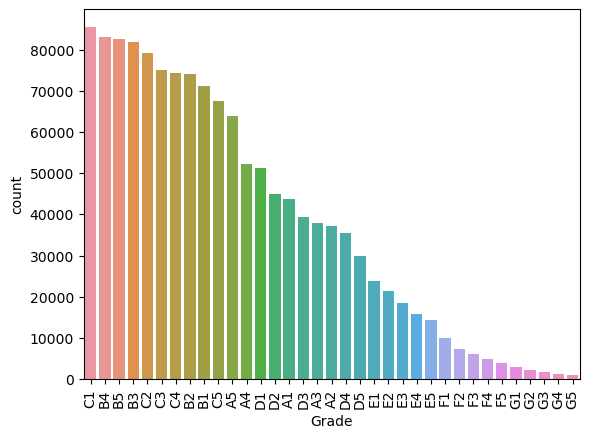

In [20]:
sns.countplot(x='sub_grade', data=data, order=data['sub_grade'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Grade')
plt.show()

## Term

In [21]:
data['term'].value_counts()

 36 months    1020743
 60 months     324567
Name: term, dtype: int64

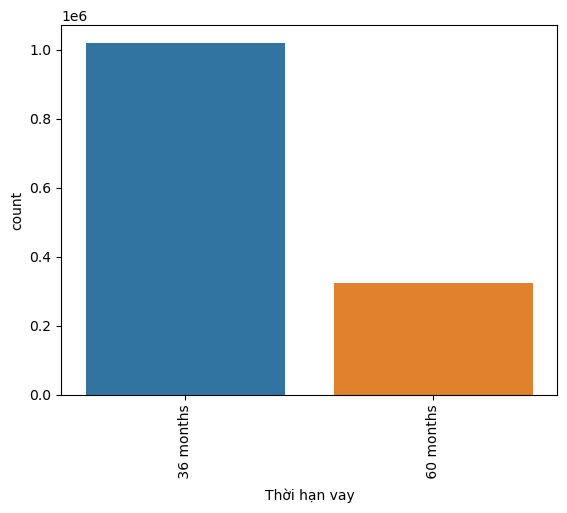

In [22]:
sns.countplot(x='term', data=data, order=data['term'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Thời hạn vay')
plt.show()

## Rates

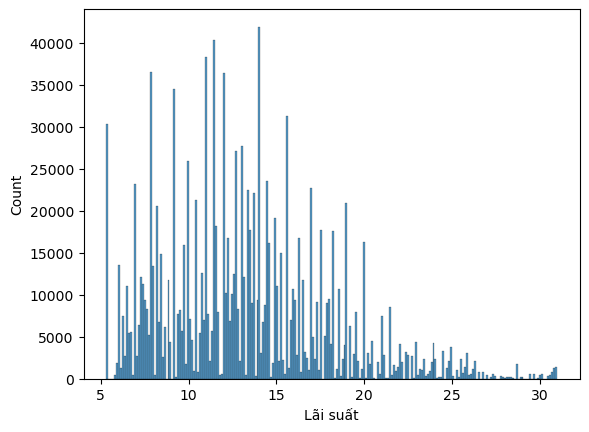

In [23]:
sns.histplot(data['int_rate'])
plt.xlabel('Lãi suất')
plt.show()

C:\Users\Quoc Trung\anaconda3\envs\PQT\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


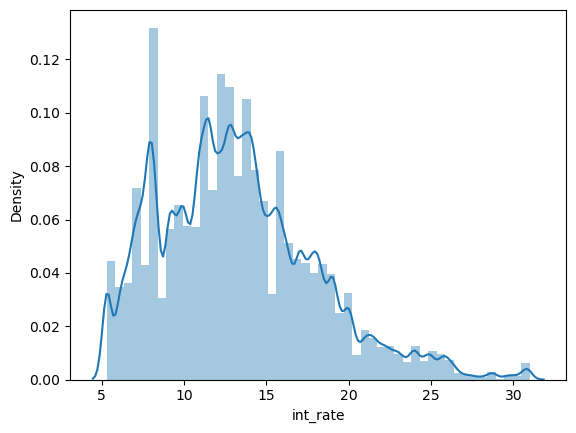

In [24]:
sns.distplot(data['int_rate'])
plt.show()

## Job

In [25]:
data['title'].unique()

array(['Debt consolidation', 'Business', nan, ..., 'takeitaway',
       'Creditt Card Loan', 'debt reduction/hone updates'], dtype=object)

In [26]:
len(data['title'].unique())

61683

In [27]:
data['emp_title'].unique()

array(['leadman', 'Engineer', 'truck driver', ..., 'personal investor',
       'Sr. Photo Producer', 'Exec Dir Internal Audit'], dtype=object)

In [28]:
len(data['emp_title'].unique())

378354

In [29]:
data['emp_length'].value_counts()

10+ years    442199
2 years      121743
< 1 year     108061
3 years      107597
1 year        88494
5 years       84154
4 years       80556
6 years       62733
8 years       60701
7 years       59624
9 years       50937
Name: emp_length, dtype: int64

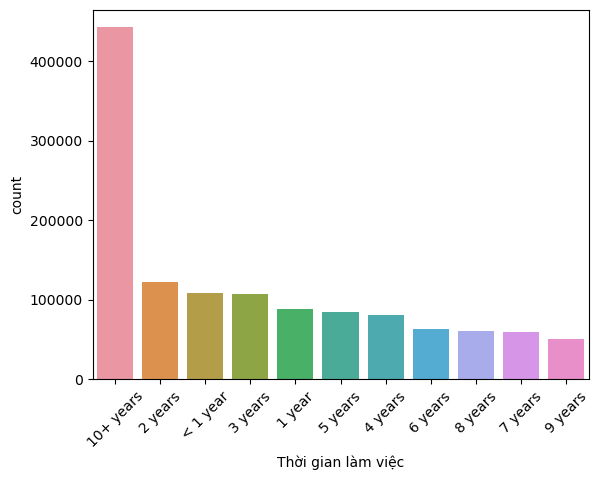

In [30]:
sns.countplot(x='emp_length', data=data, order=data['emp_length'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Thời gian làm việc')
plt.show()

## Home ownership

In [31]:
data['home_ownership'].value_counts()

MORTGAGE    665579
RENT        534421
OWN         144832
ANY            286
OTHER          144
NONE            48
Name: home_ownership, dtype: int64

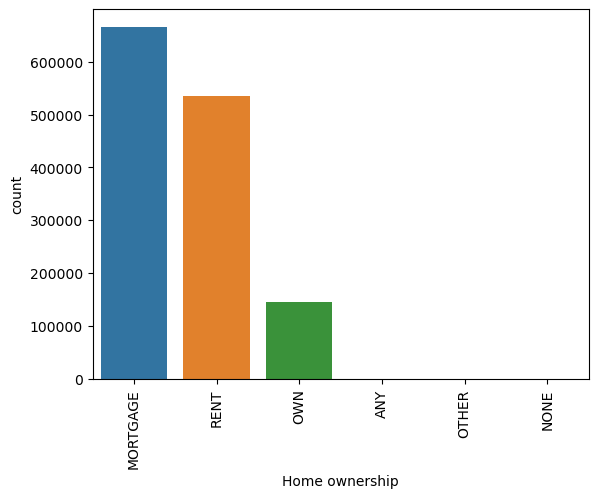

In [32]:
sns.countplot(x='home_ownership', data=data, order=data['home_ownership'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Home ownership')
plt.show()

# Clean Data

## Missing values

In [33]:
data.isnull().sum().sort_values(ascending=False)

next_pymnt_d                                  1345310
member_id                                     1345310
orig_projected_additional_accrued_interest    1341551
hardship_start_date                           1339556
hardship_length                               1339556
                                               ...   
pub_rec                                             0
open_acc                                            0
fico_range_high                                     0
fico_range_low                                      0
id                                                  0
Length: 151, dtype: int64

In [34]:
print(f'Trước khi lọc có tổng cộng {len(data.columns)} cột.')

Trước khi lọc có tổng cộng 151 cột.


In [35]:
# Ta sẽ loại bỏ các cột bị trống hơn 50% tổng dữ liệu
def drop_column(df, threshold):
    drop_col = []
    total = len(accepted)
    for col in df.columns:
        if df[col].isnull().sum() / total >= threshold:
            drop_col.append(col)
    data = df.drop(columns=drop_col)
    return data

data = drop_column(data, 0.5)

In [36]:
print(f'Sau khi lọc còn {len(data.columns)} cột.')

Sau khi lọc còn 112 cột.


In [37]:
# Fill các giá trị null = 0
data.fillna(0, inplace=True)

## Duplicate

In [38]:
# Show các giá trị bị duplicate
# data[data.duplicated()]

In [39]:
# data.duplicated().sum()

Như vậy tập dữ liệu không có giá trị bị lặp.

# Xử lý giá trị object

In [40]:
data.select_dtypes('object').head()

,id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,36 months,C,C4,leadman,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,...,190xx,PA,Aug-2003,w,Jan-2019,Mar-2019,Individual,N,Cash,N
1,68355089,36 months,C,C1,Engineer,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,...,577xx,SD,Dec-1999,w,Jun-2016,Mar-2019,Individual,N,Cash,N
2,68341763,60 months,B,B4,truck driver,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,...,605xx,IL,Aug-2000,w,Jun-2017,Mar-2019,Joint App,N,Cash,N
4,68476807,60 months,F,F1,Contract Specialist,3 years,MORTGAGE,Source Verified,Dec-2015,Fully Paid,...,174xx,PA,Jun-1998,w,Jul-2016,Mar-2018,Individual,N,Cash,N
5,68426831,36 months,C,C3,Veterinary Tecnician,4 years,RENT,Source Verified,Dec-2015,Fully Paid,...,300xx,GA,Oct-1987,w,May-2017,May-2017,Individual,N,Cash,N


In [41]:
# Drop cột url và id
data.drop(columns=['url', 'id', 'title', 'emp_title'], inplace=True)

In [42]:
obj = ['verification_status', 'pymnt_plan', 'zip_code', 'addr_state', 'initial_list_status', 'application_type' ,'hardship_flag', 'disbursement_method', 'debt_settlement_flag']
date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
data.drop(columns=obj+date, inplace=True)

# Adjust Data

# Feature Engineering

## Onehot Encoding

In [43]:
# Onehot encode cột term
data = pd.get_dummies(data, columns=['term'])

## String indexer

In [44]:
# # Label encode
# le = LabelEncoder()

In [45]:
# Thêm cột loan_status_encode từ cột loan_status, nếu giá trị là fully paid thì là 1, còn lại là 0, không dùng label encode
data['loan_status_encode'] = np.where(data['loan_status'] == 'Fully Paid', 1, 0)
data[['loan_status','loan_status_encode']].sample(10)
data.rename(columns={'loan_status_encode': 'loan_status'}, inplace=True)
# dataset.loc[dataset['loan_status'] == 'Fully Paid', 'loan_status'] = 1
# dataset.loc[dataset['loan_status'] == 'Charged Off', 'loan_status'] = 0

,loan_status,loan_status_encode
1167845,Fully Paid,1
393979,Fully Paid,1
1809286,Fully Paid,1
97350,Fully Paid,1
2076884,Fully Paid,1
229477,Charged Off,0
981761,Fully Paid,1
1307883,Charged Off,0
1659952,Fully Paid,1
78202,Fully Paid,1


In [46]:
# String indexer cột grade
data['grade'] = data['grade'].astype(str)
temp = data['grade'].unique()
dct = {k:v for v, k in enumerate(np.sort(temp))}
data['grade_encode'] = data['grade'].map(dct)
# temp['grade_encode'] = temp['grade'].astype('category').cat.codes
# data['grade_encode'] = le.fit_transform(data['grade'])

# String indexer cột sub_grade
data['sub_grade'] = data['sub_grade'].astype(str)
temp = data['sub_grade'].unique()
dct = {k:v for v, k in enumerate(np.sort(temp))}
data['sub_grade_encode'] = data['sub_grade'].map(dct)
# data['sub_grade_encode'] = le.fit_transform(data['sub_grade'])

# String indexer cột home_ownership
data['home_ownership'] = data['home_ownership'].astype(str)
temp = data['home_ownership'].unique()
dct = {k:v for v, k in enumerate(np.sort(temp))}
data['home_ownership_encode'] = data['home_ownership'].map(dct)
# data['home_ownership_encode'] = le.fit_transform(data['home_ownership'])

# # String indexer cột purpose
data['purpose'] = data['purpose'].astype(str)
temp = data['purpose'].unique()
dct = {k:v for v, k in enumerate(np.sort(temp))}
data['purpose_encode'] = data['purpose'].map(dct)
# data['purpose_encode'] = le.fit_transform(data['purpose'])

# String indexer cột emp_length
data['emp_length'] = data['emp_length'].astype(str)
temp = data['emp_length'].unique()
dct = {k:v for v, k in enumerate(np.sort(temp))}
data['emp_length_encode'] = data['emp_length'].map(dct)
# data['emp_length_encode'] = le.fit_transform(data['emp_length'])

# Drop các cột
data.drop(columns=['loan_status', 'grade', 'sub_grade', 'home_ownership', 'purpose', 'emp_length'], inplace=True)

# Build Model

In [47]:
cols = ['grade_encode', 'sub_grade_encode', 'home_ownership_encode', 'purpose_encode', 'emp_length_encode']

In [74]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features=15,
          forward=False,
          floating=False,
          scoring = 'precision',
          cv = 0).fit(X_train, y_train)

C:\Users\Quoc Trung\anaconda3\envs\PQT\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [ ]:
sfs.k_feature_names_

In [77]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
# Tạo mô hình logistic regression
model_le = LogisticRegression()
model_le.fit(X_train, y_train)

C:\Users\Quoc Trung\anaconda3\envs\PQT\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [79]:
# Đánh giá kết quả
prediction = model_le.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test, prediction)}')

# Confusion matrix
print(f'Confusion matrix: \n{confusion_matrix(y_test, prediction)}')

# Classification report
print(f'Classification report: \n{classification_report(y_test, prediction)}')

Accuracy score: 0.9988082052959293
Confusion matrix: 
[[ 79784    442]
 [    39 323328]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     80226
           1       1.00      1.00      1.00    323367

    accuracy                           1.00    403593
   macro avg       1.00      1.00      1.00    403593
weighted avg       1.00      1.00      1.00    403593



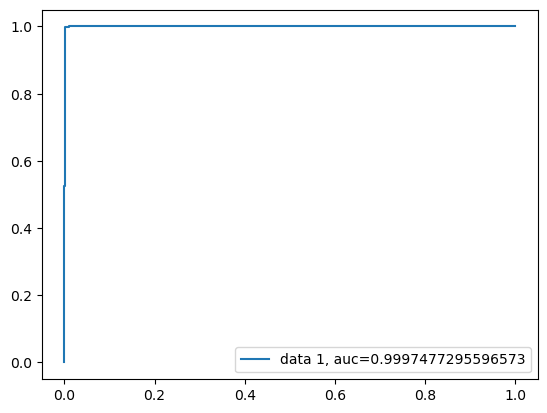

In [80]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_pred_proba = model_le.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [52]:
# import xgboost as xgb

In [67]:
# train_y = data['loan_status']
# df_train = data.drop(['loan_status'], axis=1)
# feat_names = df_train.columns.values.tolist()

# xgb_params = {
#     'eta': 0.05,
#     'max_depth': 10,
#     'subsample': 0.7,
#     'colsample_bytree': 0.7,
#     'objective': 'reg:linear',
#     'verbosity' : 0,
#     'silent': 1,
#     'seed' : 0
# }

# dtrain = xgb.DMatrix(df_train, train_y, feature_names=feat_names)
# xgb_model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=150)

In [ ]:
# fig, ax = plt.subplots(figsize=(5,8))
# xgb.plot_importance(xgb_model, max_num_features=50, height=0.5, ax=ax, show_values=False)
# plt.grid(False)
# plt.tick_params(left = False, bottom = False)
# plt.xticks([])
# plt.show()

In [ ]:
# import statsmodels.regression.linear_model as sm
# # add a column of ones as integer data type
# X = np.append(arr = np.ones((50, 1)).astype(int),
#               values = X, axis = 1)
# # choose a Significance level usually 0.05, if p>0.05
# #  for the highest values parameter, remove that value
# x_opt = x[:, [0, 1, 2, 3, 4, 5]]
# ols = sm.OLS(endog = y, exog = x_opt).fit()
# ols.summary()

In [ ]:
# from sklearn.feature_selection import SequentialFeatureSelector
# backward_selector = SequentialFeatureSelector(LogisticRegression(),
#                                               n_features_to_select=10,
#                                               direction='backward',
#                                               scoring='accuracy').fit(X_train, y_train)

In [ ]:
# # Tạo mô hình KNN
# model_knn = KNeighborsClassifier(n_neighbors=3)
# model_knn.fit(X_train, y_train)

In [ ]:
# # Đánh giá kết quả
# prediction = model_knn.predict(X_test)
# print(f'Accuracy score: {accuracy_score(y_test, prediction)}')

# # Confusion matrix
# print(f'Confusion matrix: \n{confusion_matrix(y_test, prediction)}')

# # Classification report
# print(f'Classification report: \n{classification_report(y_test, prediction)}')